In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

random forest

Assignment

About the data: Let’s consider a Company dataset with around 10 variables and 400 records.

The attributes are as follows:

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this:

Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

Approach - A random forest model can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

# 1.Import dataset


In [3]:
df=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\excel_R_lms\random_forest_assignment\Company_Data (1).csv" )

# 2.Exploratory data analysis

In [4]:
# view dimensions of dataset

df.shape

(400, 11)

In [5]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [7]:
#so according to question i m adding a column 0r feature as sales_quality have class (low{if sales is less than 25% value}, 
#high{if sales is greater than 75% value},medium {other wise}) values based on Taxable.income
sales_quality = [] 
for value in df["Sales"]: 
    if value <= 5.390000: 
        sales_quality.append("low") 
    elif value >=9.320000: 
        sales_quality.append("high") 
    else:
        sales_quality.append("medium")
       
df["sales_quality"] =sales_quality    

In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_quality
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low


In [9]:
df1=df.drop(['Sales'], axis=1)

In [10]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_quality
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,medium
4,141,64,3,340,128,Bad,38,13,Yes,No,low


# View summary of dataset

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
CompPrice        400 non-null int64
Income           400 non-null int64
Advertising      400 non-null int64
Population       400 non-null int64
Price            400 non-null int64
ShelveLoc        400 non-null object
Age              400 non-null int64
Education        400 non-null int64
Urban            400 non-null object
US               400 non-null object
sales_quality    400 non-null object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [13]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales_quality'],
      dtype='object')

Frequency distribution of values in variables Now, I will check the frequency counts of categorical variables.

In [15]:
col_names=['ShelveLoc', 'Urban',  'US', 'sales_quality']

for col in col_names:
    
    print(df1[col].value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64
Yes    258
No     142
Name: US, dtype: int64
medium    198
high      102
low       100
Name: sales_quality, dtype: int64


# Missing values in variables


In [16]:
# check missing values in variables

df1.isnull().sum()

CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
ShelveLoc        0
Age              0
Education        0
Urban            0
US               0
sales_quality    0
dtype: int64

# 3. Declare feature vector and target variable

In [17]:
x = df1.drop(['sales_quality'], axis=1)

y = df1['sales_quality']

In [18]:
#x
#y

# 4.feature engineering

In [19]:
# display categorical variables

categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['ShelveLoc', 'Urban', 'US']

In [20]:
# display numerical variables

numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

# Encode categorical variables

Now, I will encode the categorical variable

We can see that all the variables are ordinal categorical data type.

In [21]:
# import category encoders

import category_encoders as ce

In [22]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])


x1 = encoder.fit_transform(x)


In [23]:
x1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


# 5. Feature Scaling

We now have x1 data set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling

In [24]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x1= scaler.fit_transform(x1)

In [25]:
x2 = pd.DataFrame(x1, columns=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'])

In [26]:
x2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.65,0.082902,0.500000,0.015414,0.096774,-2.0,-0.476190,0.75,0.0,0.0
1,-0.70,-0.435233,0.916667,-0.046243,-1.096774,-1.0,0.400000,-1.00,0.0,0.0
2,-0.60,-0.704663,0.416667,-0.011561,-1.193548,0.0,0.171429,-0.50,0.0,0.0
3,-0.40,0.642487,-0.083333,0.747592,-0.645161,0.0,0.019048,0.00,0.0,0.0
4,0.80,-0.103627,-0.166667,0.262042,0.354839,-2.0,-0.628571,-0.25,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
395,0.65,0.808290,1.000000,-0.265896,0.354839,-1.0,-0.819048,0.00,0.0,0.0
396,0.70,-0.953368,-0.166667,-0.905588,0.096774,0.0,0.019048,-0.75,1.0,0.0
397,1.85,-0.891192,0.583333,0.369942,1.354839,0.0,-0.552381,1.00,0.0,0.0
398,-1.25,0.207254,0.166667,0.046243,-0.709677,-2.0,-0.171429,-0.50,0.0,0.0


# 6. Split data into separate training and test set

In [27]:
# split X2 and y into training and testing sets

from sklearn.model_selection import train_test_split

x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.33, random_state = 42)

In [28]:
#x2_train
#x2_test
#y_test
#y_train

# 7. Random Forest Classifier model with default parameters 

In [32]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(x2_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(x2_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6136


Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.



# 8. Random Forest Classifier model with parameter n_estimators=200

In [64]:
# instantiate the classifier with n_estimators = 200

rfc_200 = RandomForestClassifier(n_estimators=200, random_state=0)



# fit the model to the training set

rfc_200.fit(x2_train, y_train)



# Predict on the test set results

y_pred_200 = rfc_200.predict(x2_test)

# Check accuracy score 

print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))


Model accuracy score with 200 decision-trees : 0.7424


The model accuracy score with 10 decision-trees is 0.6136 but the same with 200 decision-trees is 0.7424. So, as expected accuracy increases with number of decision-trees in the model.

# 9. Find important features with Random Forest model

In [39]:
# create the classifier with n_estimators = 200

clf = RandomForestClassifier(n_estimators=200, random_state=0)



# fit the model to the training set

clf.fit(x2_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Now, I will use the feature importance variable to see feature importance scores.

In [40]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=x2_train.columns).sort_values(ascending=False)

feature_scores

Price          0.201238
Age            0.140786
CompPrice      0.124586
Population     0.119516
ShelveLoc      0.102766
Income         0.101408
Advertising    0.101126
Education      0.073332
US             0.018540
Urban          0.016703
dtype: float64

# 10. Visualize feature scores of the features

 Now, I will visualize the feature scores with matplotlib and seaborn.

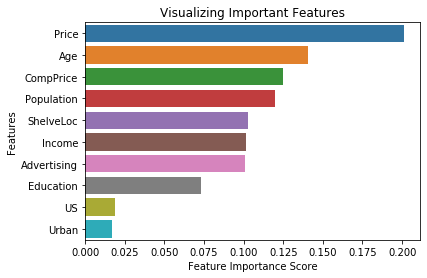

In [41]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# 11. Build Random Forest model on selected features

Now, I will drop the least important features us,urban from the model, rebuild the model and check its effect on accuracy.

In [46]:
# declare feature vector and target variable

x_f = x2.drop(['US','Urban'], axis=1)

y_f= df1['sales_quality']

In [49]:
#x_f
#y_f

# Split data into separate training and test set

In [51]:
# split X_f and y_f into training and testing sets

from sklearn.model_selection import train_test_split

x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_f, y_f, test_size = 0.33, random_state = 42)

In [55]:
#x_f_train
#x_f_test
#y_f_test
#y_f_train

In [58]:
# instantiate the classifier with n_estimators = 200

clf = RandomForestClassifier( n_estimators=200,random_state=0)



# fit the model to the training set

clf.fit(x_f_train, y_f_train)


# Predict on the test set results

y_f_pred = clf.predict(x_f_test)



# Check accuracy score 

print('Model accuracy score with US and Urban variables removed : {0:0.4f}'. format(accuracy_score(y_f_test, y_f_pred)))


Model accuracy score with US and Urban variables removed : 0.7500


so here we can conclude that by droping any features our accuracy has been increased little bit .

# 12. Confusion matrix

In [61]:
 #Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_f_test, y_f_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[24  1 10]
 [ 0 17  9]
 [ 7  6 58]]


# 13. Classification Report

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_f_test, y_f_pred))

              precision    recall  f1-score   support

        high       0.77      0.69      0.73        35
         low       0.71      0.65      0.68        26
      medium       0.75      0.82      0.78        71

    accuracy                           0.75       132
   macro avg       0.75      0.72      0.73       132
weighted avg       0.75      0.75      0.75       132

